In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [21]:
df = pd.read_csv("youth_opinions_3.csv")

for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("-")
        
df.shape

(74, 20)

In [22]:
df.sample(20)

,Gender,Faculty/School,Are you an Undergraduate or a Postgraduate?,Year,Have you cleared your Community Service Programme (CSP) requirement?,How did you clear your CSP requirement? Please give a short description.,How are you planning to clear your CSP requirement?,Do you often see elderly in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of seeing elderly in SMU or around SMU,"From your observation, what do the elderly usually do in SMU or around SMU?",Do you know that there are many elderly living near SMU such as Bras Basah Complex and Waterloo area?,"Other than your grandparents, how often do you interact with the elderly?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of interacting with elderly",Do you face any difficulties interacting with elderly?,What difficulties do you face?,Are you interested to participate in a local CSP at elderly centres?,What do you think about developing SMU and the area around it as an Intergenerational Hub?\nOur Vision of Intergenerational Hub: Elderly coming to SMU and facilities are available to promote healthy and active ageing as well as promote intergenerational interaction between elderly and youth.,Please elaborate for your choice in the previous question.,What benefits do you think SMU will get for branding itself as an Intergenerational Hub for youth and the elderly?,Do you think this Intergenerational Hub initiative will disrupt students' daily lives?,Please elaborate for your choice in the previous question..1,Are you interested to participate in local CSPs which are to be conducted in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very interested - Interest level
46,Male,School of Information Systems,Undergraduate,Year 3,Yes,Rotaract & CSP camp,-,2,-,No,1,Yes,communication,No,No way!,it is more convenient for them if the promotio...,nope,No,students are unlikely to care,1
4,Female,School of Business,Undergraduate,Year 2,Yes,"A project in PSR, SMU Arts Fest, Citi-SMU TTT ...",-,3,"Helpers, food courts, profs?",No,1,No,-,No,That's an excellent idea!,I feel this is a great idea to promote awarene...,More holistic learning for its students about ...,No,"SMU is an open space and quite integrative, so...",4
13,Male,School of Business,Undergraduate,Year 1,No,-,CSPs on ONTRAC,2,-,No,1,No,-,No,Don't really feel good about it,I don't dislike the elderly but I think SMU is...,Better understanding of the community as a who...,Yes,It might obstruct the daily activities of stud...,3
51,Male,School of Accountancy,Undergraduate,Year 2,Yes,red cross camp,-,3,survey as participant and cleaning,Yes,2,No,-,Yes,That's good!,keep it up,inclusiveness,No,different location will not interrupt the stud...,3
14,Female,School of Information Systems,Undergraduate,Year 2,Yes,OSCP,-,3,Cleaners,No,1,No,-,No,That's good!,I am like the idea of multiple land use,Socially responsible,Yes,"More crowds eg at eateries esp during lunch, t...",1
9,Male,School of Information Systems,Undergraduate,Year 1,No,-,find local csp,2,-,No,1,Yes,no patience,No,Don't really feel good about it,they are gonna hog Koufu even more. and depend...,nothing much tbh. at most just get praised by ...,Yes,cause more crowds and traffic,1
35,Male,School of Information Systems,Postgraduate,-,I do not need to,-,-,2,-,Yes,2,No,-,Yes,That's an excellent idea!,"Because wisdom comes with age and experience, ...",Better recognition and image rating,No,"As long as it is voluntary, no reason that it ...",2
72,Male,School of Information Systems,Undergraduate,Year 3,No,-,Self sourced from outside smu,2,-,Yes,2,No,-,Yes,That's good!,We might be giving the elderly a new reason to...,A school that nurture compassionate students,Yes,"While i am for this plan, the elderly may caus...",3
15,Female,School of Information Systems,Undergraduate,Year 3,Yes,Project Illuminate,-,2,-,Yes,2,No,-,Yes,That's an excellent idea!,Increase interaction and learn more about elde...,Reaching out to the

In [23]:
df.columns

Index(['Gender', 'Faculty/School',
       'Are you an Undergraduate or a Postgraduate?', 'Year',
       'Have you cleared your Community Service Programme (CSP)  requirement?',
       'How did you clear your CSP requirement? Please give a short description.',
       'How are you planning to clear your CSP requirement?',
       'Do you often see elderly in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of seeing elderly in SMU or around SMU',
       'From your observation, what do the elderly usually do in SMU or around SMU?',
       'Do you know that there are many elderly living near SMU such as Bras Basah Complex and Waterloo area?',
       'Other than your grandparents, how often do you interact with the elderly?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of interacting with elderly',
       'Do you face any difficulties interacting with elderly?',
       'What difficulties do you face?',
       'Are you interested to 

In [24]:
#renamed columns

df.columns = ['gender','faculty','ug_pg','year','csp_cleared','cleared_mode',
              'clearing_plan','freq_see_elderly','elderly_do','knowledge_elderly_pop','freq_interact_w_elderly',
              'difficulties_interacting','difficulties_face','interest_participate_elderly_center_csp','thoughts_inter_hub','thoughts','brand',
              'disrupt_student_lives','disrupt_reason','interest_csp_elderly_smu']

df['csp_cleared'] = (df['csp_cleared'] == 'Yes' ).astype(int)
print(df['csp_cleared'].value_counts())


df['knowledge_elderly_pop'] = (df['knowledge_elderly_pop'] == 'Yes' ).astype(int)
print(df['knowledge_elderly_pop'].value_counts())

df['difficulties_interacting'] = (df['difficulties_interacting'] == 'Yes' ).astype(int)
print(df['difficulties_interacting'].value_counts())

df['interest_participate_elderly_center_csp'] = (df['interest_participate_elderly_center_csp'] == 'Yes' ).astype(int)
print(df['interest_participate_elderly_center_csp'].value_counts())


df['disrupt_student_lives'] = (df['disrupt_student_lives'] == 'Yes' ).astype(int)
print(df['disrupt_student_lives'].value_counts())


#Encode the thoughts on intergenerational hub
def encode_score(data):
    if data == "That's an excellent idea!":
        return 4
    if data == "That's good!":
        return 3
    if data == "Not bad":
        return 2
    if data == "Don't really feel good about it":
        return 1
    if data == "No way!":
        return 0
    
def encode_gender(data):
    if data == "Male":
        return 1
    if data == "Female":
        return 0

df["gender"] = df["gender"].apply(encode_gender)
df["gender"] = df["gender"].astype(int)
df['thoughts_inter_hub'] = df['thoughts_inter_hub'].apply(encode_score)
df['thoughts_inter_hub'] = df['thoughts_inter_hub'].astype(int)

1    42
0    32
Name: csp_cleared, dtype: int64
0    43
1    31
Name: knowledge_elderly_pop, dtype: int64
0    41
1    33
Name: difficulties_interacting, dtype: int64
1    48
0    26
Name: interest_participate_elderly_center_csp, dtype: int64
0    56
1    18
Name: disrupt_student_lives, dtype: int64


In [25]:
df.dtypes

gender                                      int64
faculty                                    object
ug_pg                                      object
year                                       object
csp_cleared                                 int64
cleared_mode                               object
clearing_plan                              object
freq_see_elderly                            int64
elderly_do                                 object
knowledge_elderly_pop                       int64
freq_interact_w_elderly                     int64
difficulties_interacting                    int64
difficulties_face                          object
interest_participate_elderly_center_csp     int64
thoughts_inter_hub                          int64
thoughts                                   object
brand                                      object
disrupt_student_lives                       int64
disrupt_reason                             object
interest_csp_elderly_smu                    int64


In [26]:
elderly_related = df["cleared_mode"]+ df["clearing_plan"]

words_related = "elderly|Inspirar|old folks"

count = elderly_related.str.contains(words_related).value_counts()[True]
print("Number of students who did/plans to do elderly related CSP: ",count)
print("Percentage/Probability of doing elderly related csp: ",count/len(elderly_related) * 100,'%')

might_be_words_related = "Uni-Y|uniy|uni-y|rotaract|Rotaract"

count = elderly_related.str.contains(might_be_words_related).value_counts()[True]
print("Number of students who might have done or plan to do elderly related CSP: ",count)
print("Percentage/Probability who might have done or plan to do elderly related csp: ",count/len(elderly_related) * 100,'%')

def score_csp_elderly(data):
    words_related = ["elderly","Inspirar","old","folks"]
    might_be_words_related = ["Uni-Y","uniy","uni-y","rotaract","Rotaract"]
    if any(word in data for word in words_related):
        return 2
    elif any(word in data for word in might_be_words_related):
        return 1
    return 0

df["csp_elderly_related"] = elderly_related.apply(score_csp_elderly)
#df["csp_is_elderly_related"]

df.dtypes

Number of students who did/plans to do elderly related CSP:  8
Percentage/Probability of doing elderly related csp:  10.81081081081081 %
Number of students who might have done or plan to do elderly related CSP:  6
Percentage/Probability who might have done or plan to do elderly related csp:  8.108108108108109 %


gender                                      int64
faculty                                    object
ug_pg                                      object
year                                       object
csp_cleared                                 int64
cleared_mode                               object
clearing_plan                              object
freq_see_elderly                            int64
elderly_do                                 object
knowledge_elderly_pop                       int64
freq_interact_w_elderly                     int64
difficulties_interacting                    int64
difficulties_face                          object
interest_participate_elderly_center_csp     int64
thoughts_inter_hub                          int64
thoughts                                   object
brand                                      object
disrupt_student_lives                       int64
disrupt_reason                             object
interest_csp_elderly_smu                    int64


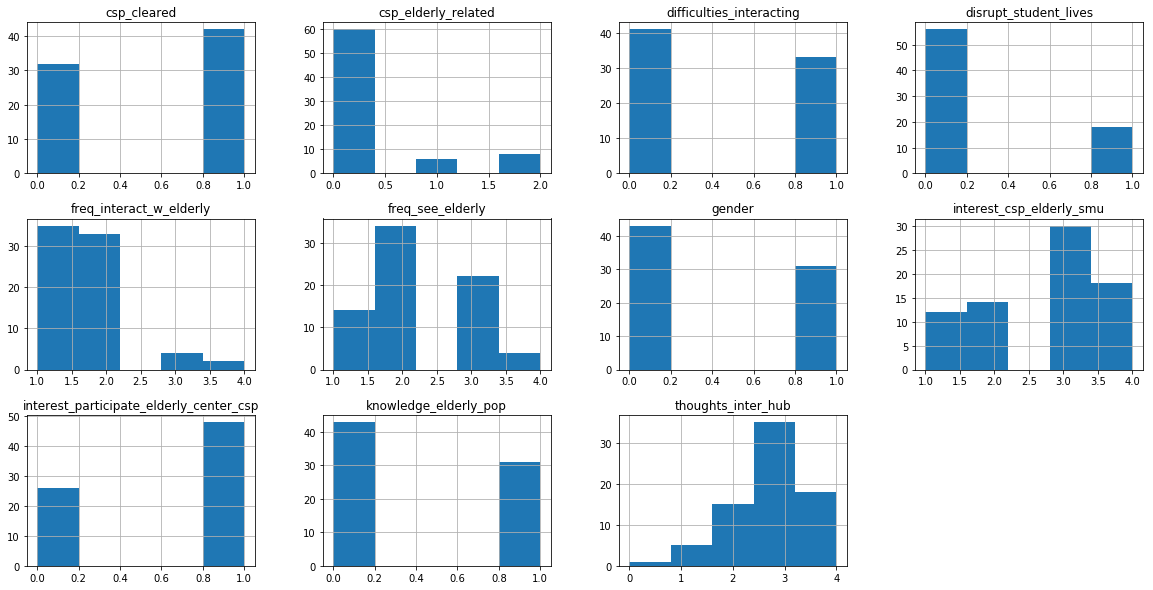

In [27]:
#See distribution of data
df.hist(bins=5, figsize=(20, 10), layout=(3, 4));

In [28]:
def remove_year_text(data):
    if data == "-":
        return 0
    data = data.replace("Year","")
    data = int(data)
    return data

df["year"] = df["year"].apply(remove_year_text)
df["year"] = df["year"].astype(int)

In [29]:
df.sample(5)

,gender,faculty,ug_pg,year,csp_cleared,cleared_mode,clearing_plan,freq_see_elderly,elderly_do,knowledge_elderly_pop,...,difficulties_interacting,difficulties_face,interest_participate_elderly_center_csp,thoughts_inter_hub,thoughts,brand,disrupt_student_lives,disrupt_reason,interest_csp_elderly_smu,csp_elderly_related
9,1,School of Information Systems,Undergraduate,1,0,-,find local csp,2,-,0,...,1,no patience,0,1,they are gonna hog Koufu even more. and depend...,nothing much tbh. at most just get praised by ...,1,cause more crowds and traffic,1,0
13,1,School of Business,Undergraduate,1,0,-,CSPs on ONTRAC,2,-,0,...,0,-,0,1,I don't dislike the elderly but I think SMU is...,Better understanding of the community as a who...,1,It might obstruct the daily activities of stud...,3,0
66,1,School of Information Systems,Undergraduate,4,1,Local CSP helping children with financial diff...,-,3,"Small gatherings, strolling",1,...,1,Language barrier,1,3,It's a good idea to centralise and have an off...,"Inclusive,",0,-,3,0
16,1,School of Accountancy,Undergraduate,1,1,OCSP - Vietnam,-,3,Sit at the benches/sleep,0,...,0,-,1,4,Socialising and making elderly not feel alone ...,A more common visited place by companies (gove...,0,It will not be of any problem if it involves a...,3,0
6,1,School of Information Systems,Undergraduate,2,1,Joining campa,-,3,Nil,0,...,0,-,1,3,Lessen social isolation,Corporatw responsibility as a leading university,1,Spend more time less time to study,3,0


In [30]:
df.dtypes

gender                                      int64
faculty                                    object
ug_pg                                      object
year                                        int64
csp_cleared                                 int64
cleared_mode                               object
clearing_plan                              object
freq_see_elderly                            int64
elderly_do                                 object
knowledge_elderly_pop                       int64
freq_interact_w_elderly                     int64
difficulties_interacting                    int64
difficulties_face                          object
interest_participate_elderly_center_csp     int64
thoughts_inter_hub                          int64
thoughts                                   object
brand                                      object
disrupt_student_lives                       int64
disrupt_reason                             object
interest_csp_elderly_smu                    int64


In [31]:
df["csp_elderly_related"].sample(10)

70    0
15    0
23    0
21    0
72    0
35    0
11    2
45    0
8     2
54    0
Name: csp_elderly_related, dtype: int64

In [32]:
def categories_interest(data):
    if data == 4:
        return "Very High"
    if data == 3:
        return "High"
    if data == 2:
        return "Low"
    if data == 1:
        return "Very Low"

def categories_interaction_w_elderly(data):
    if data == 4:
        return "Very often"
    if data == 3:
        return "Often"
    if data == 2:
        return "Seldom"
    if data == 1:
        return "Not at All"

df["interest_csp_elderly_categorized"] = df["interest_csp_elderly_smu"].apply(categories_interest)
#df["interest_csp_elderly_categorized"]


df["interact_w_elderly_categorized"] = df["freq_interact_w_elderly"].apply(categories_interaction_w_elderly)
df["interact_w_elderly_categorized"]

0     Very often
1     Not at All
2     Not at All
3     Not at All
4     Not at All
         ...    
69    Not at All
70    Not at All
71        Seldom
72        Seldom
73        Seldom
Name: interact_w_elderly_categorized, Length: 74, dtype: object

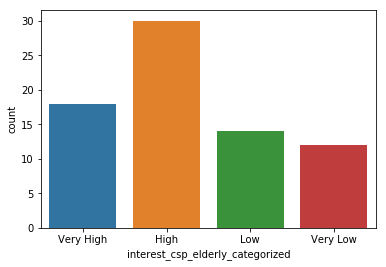

In [33]:
sns.countplot(df["interest_csp_elderly_categorized"])

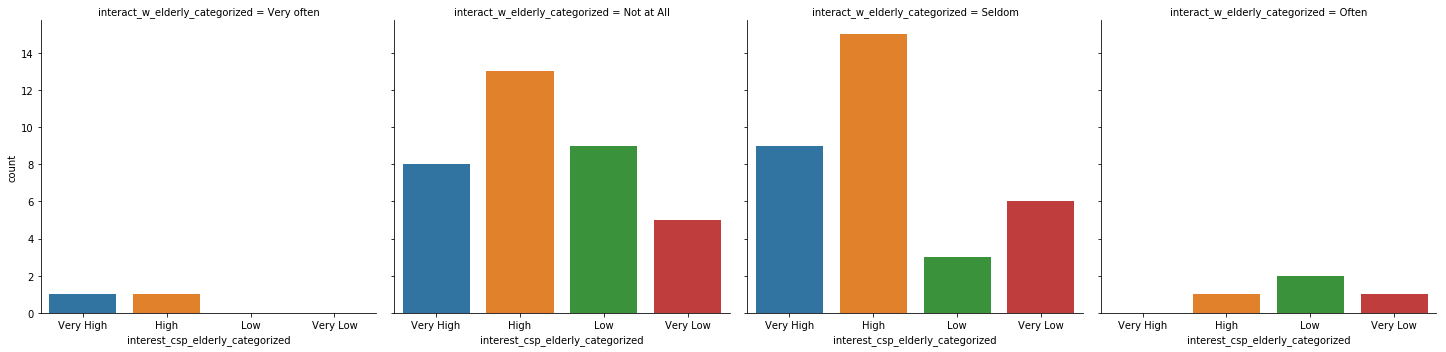

In [34]:

sns.catplot(x="interest_csp_elderly_categorized", kind="count", data=df,col="interact_w_elderly_categorized")

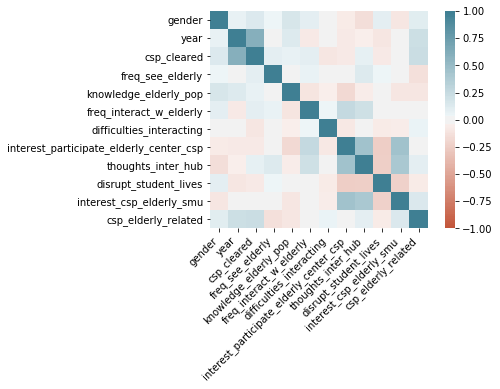

In [35]:
#Correlation of variables in the data
corr = df.corr()

ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [36]:
corr.round(5)

,gender,year,csp_cleared,freq_see_elderly,knowledge_elderly_pop,freq_interact_w_elderly,difficulties_interacting,interest_participate_elderly_center_csp,thoughts_inter_hub,disrupt_student_lives,interest_csp_elderly_smu,csp_elderly_related
gender,1.00000,0.07519,0.13299,0.04387,0.16729,0.08933,0.00968,-0.06358,-0.14555,0.09317,-0.09880,0.11694
year,0.07519,1.00000,0.60815,0.02031,0.12357,-0.07603,0.03375,-0.07162,-0.04596,-0.09248,0.01221,0.22461
csp_cleared,0.13299,0.60815,1.00000,0.09831,0.07770,0.08948,-0.09492,-0.07104,0.08062,-0.07732,-0.01762,0.23066
freq_see_elderly,0.04387,0.02031,0.09831,1.00000,0.01005,0.06683,0.02903,-0.01322,0.13200,0.04309,0.02201,-0.12173
knowledge_elderly_pop,0.16729,0.12357,0.07770,0.01005,1.00000,-0.10396,-0.04542,-0.17832,-0.05479,-0.03451,-0.09880,-0.09310
freq_interact_w_elderly,0.08933,-0.07603,0.08948,0.06683,-0.10396,1.00000,0.03993,0.26023,0.21808,-0.01922,0.03235,0.00079
difficulties_interacting,0.00968,0.03375,-0.09492,0.02903,-0.04542,0.03993,1.00000,-0.08003,-0.01623,-0.06508,-0.05635,0.04958
interest_participate_elderly_center_csp,-0.06358,-0.07162,-0.07104,-0.01322,-0.17832,0.26023,-0.08003,1.00000,0.45296,-0.24251,0.45034,0.03168
thoughts_inter_hub,-0.14555,-0.04596,0.08062,0.13200,-0.05479,0.21808,-0.01623,0.45296,1.00000,-0.22850,0.40584,0.09096
disrupt_student_lives,0.09317,-0.09248,-0.07732,0.04309,-0.03451,-0.01922,-0.06508,-0.24251,-0.22850,1.00000,-0.22384,-0.06528


In [37]:
x_cols = ["gender","freq_see_elderly","knowledge_elderly_pop","freq_interact_w_elderly","difficulties_interacting","disrupt_student_lives","thoughts_inter_hub"]
y_col = "interest_csp_elderly_smu"

series = []

for col in x_cols:
    series.append(df[col])

x_df = pd.concat(series,axis=1)
x_df.head(20)

,gender,freq_see_elderly,knowledge_elderly_pop,freq_interact_w_elderly,difficulties_interacting,disrupt_student_lives,thoughts_inter_hub
0,0,1,0,4,0,0,3
1,0,2,0,1,0,0,1
2,0,1,0,1,0,0,3
3,0,1,1,1,0,0,3
4,0,3,0,1,0,0,4
5,0,1,0,1,0,1,2
6,1,3,0,4,0,1,3
7,1,1,0,2,0,0,3
8,1,2,1,2,0,0,4
9,1,2,0,1,1,1,1


In [38]:
#If user indicates 3 or more it means they are keen to explore elderly related CSP in SMU
def prep_class_labels(data):
    if data >= 3:
        return 1
    else:
        return 0

    
x_data = x_df
prepped_y = df[y_col].apply(prep_class_labels)
y_data = prepped_y

